In [ ]:
'''Objective: Build a model to predict the band gap of a material based on what element it is,
            its position in space, and its lattice information, using regression based machine learning'''


'''Version goal: to combine two data sets x1 and x3 into a single array X to use in training '''

In [1]:
#Call data

from aflow import *

result = search(batch_size=20
        ).filter(K.Egap > 1
        ).filter(K.nspecies == 1)

#part = result[0:1000]

#len(part)
print(result[0].Egap)
#for entry in result[0:5]:
    #print(entry.Egap)

1.0032


In [26]:
#make data right type/shape

#make X1 from atomic name to atomic number
from mendeleev import element
import numpy as np

at_num = []

for i in result[0:6]:
    ele = (i.species[0])
    z= ele.replace('\n','')
    number= element(z).atomic_number
    #print(number)
    at_num.append(number)
    
#print(at_num)

x1= np.asarray(at_num).reshape(-1,1)
print(x1)

[[34]
 [ 9]
 [14]
 [14]
 [ 8]
 [ 8]]


In [30]:
#X3 array

geo=[]

for entry in result[0:6]:
    #x2= entry.positions_fractional
    #X2.append(x2)
    
    x3= entry.geometry
    #print(X3)
    geo.append(x3)
    
#print(geo)


x3=np.asarray(geo).reshape(6,6)

print(x3)



[[  4.523779   4.523779   5.049212  90.        90.       120.      ]
 [  3.546542   3.546542   3.910963  90.        90.       120.      ]
 [ 10.21488   10.21495   10.38431   90.        90.       119.9998  ]
 [ 10.8115    10.8115    10.8115   109.4712   109.4712   109.4712  ]
 [  6.934511   7.59636    7.826332  89.9968    90.        90.      ]
 [  5.171968   5.171968   7.033757  90.        90.       136.9788  ]]


In [59]:
y=[]
for entry in result[0:6]:
    BG= entry.Egap
    y.append(BG)
    
Y=np.asarray(y).reshape(-1,1)

print(Y)

[[1.0032]
 [1.0066]
 [1.1182]
 [1.1937]
 [1.1997]
 [1.2933]]


In [52]:
'''goal: to combine the two data sets x1 & x3 into a single array X'''

#X= np.empty([6,7])


X= np.hstack((x3,x1))


X.shape

(6, 7)

In [61]:
#Split the data

from sklearn.cross_validation import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)

In [63]:
#implement KNeighborsRegressor---choose estimator

from sklearn.neighbors import RadiusNeighborsRegressor
estimator = RadiusNeighborsRegressor()

In [64]:
#train data

#X2_train, X3_train,

import numpy as np
import matplotlib.pyplot as plt

estimator.fit(X_train,  Y_train)
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(Y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))



The accuracy is 0.0%


C:\Users\Katie\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Katie\Miniconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


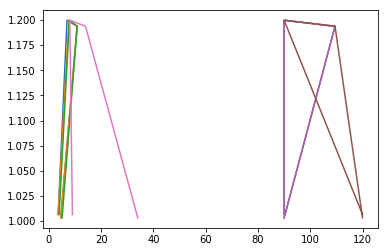

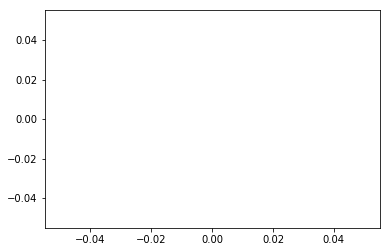

In [66]:
plt.plot(X_train, Y_train)
plt.show()
plt.plot(X_test, y_predicted)
plt.show()